In [10]:
!pip3 install speechbrain
!pip3 install sox
!pip3 install soundfile
!pip3 install pydub

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
from speechbrain.inference.separation import SepformerSeparation as separator
import torchaudio

import torch

import matplotlib.pyplot as plt

In [2]:
torchaudio.__version__

'2.3.0'

In [3]:
torchaudio.set_audio_backend("soundfile")

/var/folders/my/m5k3cyhd3p75zf8vjt23jfdw0000gn/T/ipykernel_75463/1822137616.py:1: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


In [4]:
torchaudio.list_audio_backends() 

['soundfile']

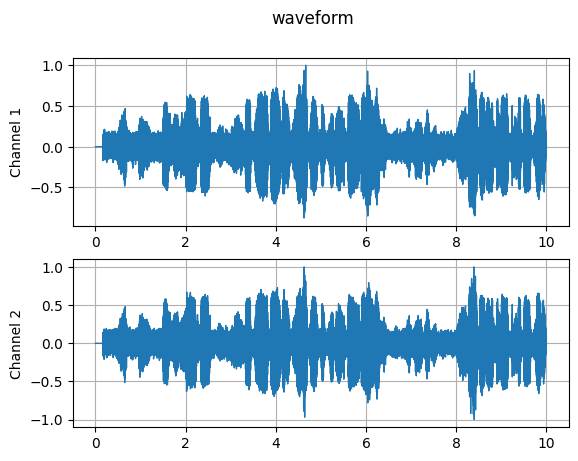

In [13]:
waveform, sample_rate = torchaudio.load("../data/raw/ocean_voice_10s.wav")
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
plot_waveform(waveform, sample_rate)

In [5]:
model = separator.from_hparams(source="speechbrain/sepformer-wham", savedir='pretrained_models/sepformer-wham')


In [14]:
# for custom file, change path
est_sources = model.separate_file(path='../data/raw/ocean_voice_10s.wav') 

Resampling the audio from 44100 Hz to 8000 Hz


In [16]:
est_sources.shape

torch.Size([1, 80000, 2])

In [17]:

torchaudio.save("../data/sep/source1hat.wav", est_sources[:, :, 0].detach().cpu(), 8000)
torchaudio.save("../data/sep/source2hat.wav", est_sources[:, :, 1].detach().cpu(), 8000)